# ADA project
## EDA
## EDA - Elk

##### Elk description

In [1]:
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations
elk_data = data[data['animal-type'] == 'Elk']

# Total number of unique elk
total_elk = elk_data['individual-id'].nunique()

# Number of observations per elk
observations_per_elk = elk_data['individual-id'].value_counts()

# Timeframe of observations
earliest_observation = elk_data['timestamp'].min()
latest_observation = elk_data['timestamp'].max()

# Location spread
min_latitude = elk_data['location-lat'].min()
max_latitude = elk_data['location-lat'].max()
min_longitude = elk_data['location-long'].min()
max_longitude = elk_data['location-long'].max()


# Observations per year (or month)
elk_data['timestamp'] = pd.to_datetime(elk_data['timestamp'])
observations_per_year = elk_data['timestamp'].dt.year.value_counts()
observations_per_month = elk_data['timestamp'].dt.to_period('M').value_counts()

# Print the results
print(f"Total number of elk: {total_elk}")
print("Number of observations per elk:")
print(observations_per_elk)
print(f"Timeframe of observations: {earliest_observation} to {latest_observation}")
print(f"Location spread: Latitudes from {min_latitude} to {max_latitude}, Longitudes from {min_longitude} to {max_longitude}")
print("Observations per year:")
print(observations_per_year)
print("Observations per month:")
print(observations_per_month)


Total number of elk: 42
Number of observations per elk:
individual-id
GR104          12309
YL93           10503
YL58            9856
YL73            9614
YL80            6932
BL234           5584
YL130_OR9       5580
OR54_BL260      5535
BL201           5279
YL92            4437
YL96            4128
BL269           4072
YL94            3948
YL78            3928
YL25            3897
YL59            3615
YL121_BL250     3484
GP2             3253
YL74            3248
YL15            3218
YL57            3187
YL64            3183
YL119_BL245     3172
YL42            3150
YL29            2883
YL77            2639
YL5             2475
YL56            2217
YL91            2215
YL90            1765
YL140_BL257     1234
BL215           1233
YL164_BL255     1091
GR169            991
YL86             877
YL135_BL222      570
OR59_BL259       560
BL224            441
GR182            175
YL72             167
YL79             108
YL1               49
Name: count, dtype: int64
Timeframe of observati

/var/folders/cd/f_ps01dx04n4r8lqhy1tjk5r0000gn/T/ipykernel_1834/3026031195.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/var/folders/cd/f_ps01dx04n4r8lqhy1tjk5r0000gn/T/ipykernel_1834/3026031195.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elk_data['timestamp'] = pd.to_datetime(elk_data['timestamp'])


#### Total of number of obersvations in merged_data

In [4]:
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations
data = data[data['animal-type'] == 'Elk']

# Calculate the total number of observations
total_observations = data.shape[0]
total_observations

/var/folders/cd/f_ps01dx04n4r8lqhy1tjk5r0000gn/T/ipykernel_1834/3059078448.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


146802

##### Timeframe of observation per elk

In [ ]:
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations
elk_data = data[data['animal-type'] == 'Elk']

# Convert the 'timestamp' column to datetime
elk_data['timestamp'] = pd.to_datetime(elk_data['timestamp'])

# Group by 'individual-local-identifier' and get the first and last timestamp
first_last_obs = elk_data.groupby('individual-id')['timestamp'].agg(['min', 'max']).reset_index()

# Rename columns for clarity
first_last_obs.rename(columns={'min': 'First Observation', 'max': 'Last Observation'}, inplace=True)

# Display the result
print(first_last_obs)


##### Distance travelled by each elk

In [ ]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees).
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations
elk_data = data[data['animal-type'] == 'Elk']

# Ensure the data is sorted by individual and timestamp
elk_data.sort_values(by=['individual-id', 'timestamp'], inplace=True)

# Calculate the distance traveled by each wolf
elk_data['shifted_long'] = elk_data.groupby('individual-id')['location-long'].shift(-1)
elk_data['shifted_lat'] = elk_data.groupby('individual-id')['location-lat'].shift(-1)
elk_data['distance'] = elk_data.apply(lambda row: haversine(row['location-long'], row['location-lat'], row['shifted_long'], row['shifted_lat']) if not np.isnan(row['shifted_long']) else 0, axis=1)

# Summing up the distances for each wolf and include the pack name
total_distance_by_elk = elk_data.groupby(['individual-id'])['distance'].sum().reset_index(name='total_distance')

# Print the result with the pack name as the last column
print(total_distance_by_elk[['individual-id', 'total_distance']])


# Distance travelled by each elk per month on average

In [2]:
#####

### Visualisation - ELk

##### Heat map

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations
elk_data = data[data['animal-type'] == 'Elk']

# Generate a base map
# Determine the center of your map - this example uses the mean of the latitudes and longitudes
map_center = [elk_data['location-lat'].mean(), elk_data['location-long'].mean()]
heat_map_elk = folium.Map(location=map_center, zoom_start=6)

# Add a heatmap to the map
heat_data = [[row['location-lat'], row['location-long']] for index, row in elk_data.iterrows()]
HeatMap(heat_data, radius=15, blur=15).add_to(heat_map_elk)

# Save the map
output_map_path = '../Visualisation/EDA/Heat_map_elk.html'
heat_map_elk.save(output_map_path)

heat_map_elk

##### Movement map

In [ ]:
import folium
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations and sort by individual and timestamp
elk_data = data[data['animal-type'] == 'Elk'].copy()
elk_data['timestamp'] = pd.to_datetime(elk_data['timestamp'])
elk_data.sort_values(by=['individual-id', 'timestamp'], inplace=True)

# Initialize a base map
map_center = [elk_data['location-lat'].mean(), elk_data['location-long'].mean()]
movement_map_elk = folium.Map(location=map_center, zoom_start=6)

# Prepare a color for each elk
unique_ids = elk_data['individual-id'].unique()
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_ids)))

# Define the HTML code for a red cross
html_green_cross = '''
<div style="position: relative; width: 8px; height: 8px;">
    <div style="position: absolute; top: 50%; left: 0; transform: translate(0%, -50%); width: 100%; height: 2px; background-color: green;"></div>
    <div style="position: absolute; top: 0; left: 50%; transform: translate(-50%, 0%); width: 2px; height: 100%; background-color: green;"></div>
</div>
'''

html_red_cross = '''
<div style="position: relative; width: 8px; height: 8px;">
    <div style="position: absolute; top: 50%; left: 0; transform: translate(0%, -50%); width: 100%; height: 2px; background-color: red;"></div>
    <div style="position: absolute; top: 0; left: 50%; transform: translate(-50%, 0%); width: 2px; height: 100%; background-color: red;"></div>
</div>
'''

# Iterate through each elk and plot their movements
for idx, elk_id in enumerate(elk_data['individual-id'].unique()):
    elk = elk_data[elk_data['individual-id'] == elk_id]
    
    # Create lines for each movement
    locations = elk[['location-lat', 'location-long']].values.tolist()
    if len(locations) > 1:  # Need at least two points to create a line
        # Add lines for movement
        folium.PolyLine(locations, color='grey', weight=2, opacity=0.5).add_to(movement_map_elk)
        
        # Add crosses at the first and last observation
        first_observation = locations[0]
        last_observation = locations[-1]
        folium.Marker(location=first_observation, icon=folium.DivIcon(html=html_green_cross)).add_to(movement_map_elk)
        folium.Marker(location=last_observation, icon=folium.DivIcon(html=html_red_cross)).add_to(movement_map_elk)

# Save the map
output_map_path = '../Visualisation/EDA/Movement_map_elk.html'
movement_map_elk.save(output_map_path)

movement_map_elk


#### Elk clustering
##### Cluster map
K-means clustering

/var/folders/cd/f_ps01dx04n4r8lqhy1tjk5r0000gn/T/ipykernel_1746/3753705287.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


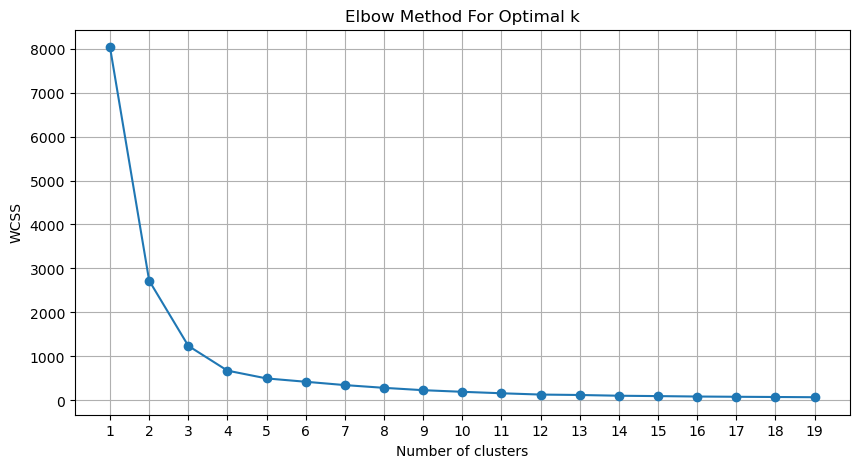

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
# Filter for wolf observations
data = data[data['animal-type'] == 'Elk']
elk_coords = data[['location-lat', 'location-long']]

# Calculate WCSS for a range of k values
wcss = []
for i in range(1, 20):  # You can change the range of i based on your requirements
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(elk_coords)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations
elk_data = data[data['animal-type'] == 'Elk']
elk_coords = elk_data[['location-lat', 'location-long']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=15, random_state=0).fit(elk_coords)
elk_data['cluster'] = kmeans.labels_

# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Create map
map_center = [elk_data['location-lat'].mean(), elk_data['location-long'].mean()]
cluster_map = folium.Map(location=map_center, zoom_start=6)

# Create heatmap data from the elk coordinates
heat_data = elk_coords.values.tolist()

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=15, min_opacity=0.5).add_to(cluster_map)

# Plot cluster centroids
for centroid in centroids:
    folium.CircleMarker(
        location=(centroid[0], centroid[1]),
        radius=10,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup='Cluster Center'
    ).add_to(cluster_map)

# Save the map
output_map_path = '../Visualisation/EDA/cluster_kmeans_map_elk.html'
cluster_map.save(output_map_path)

cluster_map


GMM clustering

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
data = data[data['animal-type'] == 'Elk']
elk_coords = data[['location-lat', 'location-long']]

# Ensure there are no missing values
elk_coords.dropna(inplace=True)

# Calculate BIC for a range of number of components
bic = []
for i in range(1, 20):  # Adjust the range as needed
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(elk_coords)
    bic.append(gmm.bic(elk_coords))

# Plot the elbow graph for BIC
plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), bic, marker='o')
plt.title('Elbow Method For Optimal Number of GMM Components')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import folium

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations
elk_data = data[data['animal-type'] == 'Elk']
elk_coords = elk_data[['location-lat', 'location-long']]

# Perform GMM clustering
gmm = GaussianMixture(n_components=15, random_state=0).fit(elk_coords)
elk_data['cluster'] = gmm.predict(elk_coords)

# Calculate centroids (mean of clusters)
centroids = elk_data.groupby('cluster').mean()[['location-lat', 'location-long']]

# Create map
map_center = [elk_data['location-lat'].mean(), elk_data['location-long'].mean()]
cluster_map = folium.Map(location=map_center, zoom_start=6)

# Create heatmap data from the elk coordinates
heat_data = elk_coords.values.tolist()

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=15, min_opacity=0.5).add_to(cluster_map)

# Plot centroids
for idx, row in centroids.iterrows():
    folium.CircleMarker(
        location=(row['location-lat'], row['location-long']),
        radius=10,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(cluster_map)


cluster_map.save('../Visualisation/EDA/cluster_gmm_map_elk.html')
cluster_map


##### Clustering performances :
--> K-means better than GMM

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture  # Corrected import
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for elk observations
elk_data = data[data['animal-type'] == 'Elk']
elk_coords = elk_data[['location-lat', 'location-long']]

# K-Means clustering
kmeans = KMeans(n_clusters=11, random_state=0).fit(elk_coords)
kmeans_labels = kmeans.labels_

# Gaussian Mixture clustering
gmm = GaussianMixture(n_components=11, random_state=0).fit(elk_coords)
gmm_labels = gmm.predict(elk_coords)

# Evaluate clustering performance

calinski_kmeans = calinski_harabasz_score(elk_coords, kmeans_labels)
calinski_gmm = calinski_harabasz_score(elk_coords, gmm_labels)

davies_kmeans = davies_bouldin_score(elk_coords, kmeans_labels)
davies_gmm = davies_bouldin_score(elk_coords, gmm_labels)

print("Calinski-Harabasz Scores: K-Means:", calinski_kmeans, "GMM:", calinski_gmm)
print("Davies-Bouldin Scores: K-Means:", davies_kmeans, "GMM:", davies_gmm)


## EDA - Wolf

##### Wolf per pack

In [4]:
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
data = data[data['animal-type'] == 'Wolf']

# Group by 'Pack name' and aggregate the unique 'individual-id's within each group
pack_wolves = data.groupby('Pack name')['individual-id'].unique()

# Count the number of wolves in each pack
pack_counts = data.groupby('Pack name')['individual-id'].nunique()

# Create a descriptive text for each pack including the count and IDs of wolves
pack_descriptions = pack_wolves.apply(lambda x: f"{len(x)} wolves: {' '.join(x)}").to_dict()

# Display the number of wolves and their IDs in each pack
for pack, ids in pack_descriptions.items():
    count = pack_counts[pack]
    print(f"{pack} - {ids}")

# B065 changed pack from Ranch to Cascade

/var/folders/cd/f_ps01dx04n4r8lqhy1tjk5r0000gn/T/ipykernel_1746/823432663.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Bow Valley - 3 wolves: B087 JW01 JW02
Cascade - 3 wolves: B045 B065 B085
Ranch - 3 wolves: B077 B080 B086
Red Deer - 4 wolves: B042 B081 B082 B084
Wildhorse - 3 wolves: B078 B079 B083


##### Timeframe of observation per wolf

In [5]:
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
data = data[data['animal-type'] == 'Wolf']

# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Group by 'individual-local-identifier' and get the first and last timestamp
first_last_obs = data.groupby('individual-id')['timestamp'].agg(['min', 'max']).reset_index()

# Rename columns for clarity
first_last_obs.rename(columns={'min': 'First Observation', 'max': 'Last Observation'}, inplace=True)

# Display the result
print(first_last_obs)


   individual-id   First Observation    Last Observation
0           B042 2002-12-20 19:02:06 2003-07-20 04:01:12
1           B045 2002-12-20 19:00:00 2004-01-21 23:00:22
2           B065 2003-12-16 19:01:27 2004-03-05 19:00:49
3           B077 2003-12-17 07:01:04 2004-10-01 22:00:00
4           B078 2003-12-16 19:00:49 2004-04-19 18:01:16
5           B079 2003-12-18 19:01:17 2004-01-17 19:01:14
6           B080 2004-03-21 19:01:00 2004-09-24 22:01:00
7           B081 2004-03-21 23:00:00 2004-10-13 12:00:00
8           B082 2004-03-21 23:01:00 2004-10-14 08:01:00
9           B083 2004-03-21 23:00:00 2004-11-03 03:01:00
10          B084 2004-04-20 18:00:00 2004-10-24 08:01:00
11          B085 2004-05-20 20:02:00 2004-12-07 19:00:00
12          B086 2004-06-25 18:01:00 2004-10-02 00:00:00
13          B087 2004-06-24 17:00:00 2004-12-07 20:00:00
14          JW01 2009-12-19 09:03:10 2011-06-22 04:01:24
15          JW02 2011-02-11 23:00:54 2011-03-16 20:01:26


/var/folders/cd/f_ps01dx04n4r8lqhy1tjk5r0000gn/T/ipykernel_1746/2102013826.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


##### Number of observations per wolf

In [6]:
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
data = data[data['animal-type'] == 'Wolf']

# Count the number of observations per individual wolf
observation_counts = data['individual-id'].value_counts()

# Convert to DataFrame for better readability if desired
observation_counts_df = observation_counts.reset_index()
observation_counts_df.columns = ['individual-id', 'observation_count']

# Display the counts
print(observation_counts_df)

   individual-id  observation_count
0           B077               7695
1           JW01               5742
2           B085               5415
3           B065               4617
4           B078               4602
5           B086               4146
6           B083               3717
7           B087               3612
8           B080               3103
9           B081               2959
10          B084               2603
11          B045               2464
12          B082               2008
13          B042               1321
14          JW02                366
15          B079                 97


/var/folders/cd/f_ps01dx04n4r8lqhy1tjk5r0000gn/T/ipykernel_1746/2269657220.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


##### Distance travelled by each wolf

In [ ]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees).
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
data = data[data['animal-type'] == 'Wolf']

# Ensure the data is sorted by individual and timestamp
data.sort_values(by=['individual-id', 'timestamp'], inplace=True)

# Calculate the distance traveled by each wolf
data['shifted_long'] = data.groupby('individual-id')['location-long'].shift(-1)
data['shifted_lat'] = data.groupby('individual-id')['location-lat'].shift(-1)
data['distance'] = data.apply(lambda row: haversine(row['location-long'], row['location-lat'], row['shifted_long'], row['shifted_lat']) if not np.isnan(row['shifted_long']) else 0, axis=1)

# Summing up the distances for each wolf and include the pack name
total_distance_by_wolf = data.groupby(['individual-id', 'Pack name'])['distance'].sum().reset_index(name='total_distance')

# Order by pack name
total_distance_by_wolf = total_distance_by_wolf.sort_values(by='Pack name')

# Print the result with the pack name as the last column
print(total_distance_by_wolf[['individual-id', 'total_distance', 'Pack name']])

# Distance travelled on average per month per wolf !!!!

In [1]:
########

##### Area covered - MCP

In [ ]:
import warnings

# Filter out future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import geopandas as gpd
from shapely.geometry import MultiPoint

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
data = data[data['animal-type'] == 'Wolf']

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data['location-long'], data['location-lat'])
)

# Set the coordinate reference system to WGS84 (latitude/longitude)
gdf.set_crs(epsg=4326, inplace=True)

# Convert to a projected CRS to measure area in square kilometers (e.g., World Equidistant Cylindrical)
gdf.to_crs(epsg=4087, inplace=True)  # This CRS allows for area calculations

# Initialize an empty DataFrame to store the area for each wolf
wolf_areas = pd.DataFrame(columns=['individual-id', 'area_km2'])

# Calculate MCP and area for each wolf
for wolf_id in gdf['individual-id'].unique():
    # Extract points for the current wolf
    points = gdf[gdf['individual-id'] == wolf_id]['geometry']
    
    # Create a MultiPoint object from the wolf's points
    multipoint = MultiPoint([point for point in points])
    
    # Create the MCP (convex hull of the points)
    mcp = multipoint.convex_hull
    
    # Calculate the area in square kilometers and store it
    area_km2 = mcp.area / 1e6  # Convert from m² to km²
    wolf_areas = wolf_areas.append({'individual-id': wolf_id, 'area_km2': area_km2}, ignore_index=True)


# Calculate the average area covered per year for each wolf
wolf_areas['average_area_per_year_km2'] = wolf_areas['area_km2'] / 10

# Display the area covered by each wolf
print(wolf_areas)

#### Distance traveled depending on the period of the day

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Convert timestamps to datetime and sort by individual and timestamp
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Filter out the wolf data
wolf_data = data[data['animal-type'] == 'Wolf'].copy()

# Create a new column for the part of day based on the hour of the timestamp
wolf_data['part_of_day'] = pd.cut(
    wolf_data['timestamp'].dt.hour,
    bins=[0, 6, 12, 18, 24],
    include_lowest=True,
    labels=['Night', 'Morning', 'Day', 'Evening']
)

# Group by part of day and sum the distances
distance_by_time = wolf_data.groupby('part_of_day')['distance_traveled'].sum()

# Create a bar plot
distance_by_time.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distance Traveled by Wolves at Different Times of the Day')
plt.xlabel('Part of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

# Save the plot as an image
output_plot_path = '../Visualisation/EDA/distance_by_time.png'


### Packs cohesion

#### Correlation within a pack - eg. Ranch

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for wolf observations
wolf_data = data[data['animal-type'] == 'Wolf'].copy()

# Ensure the timestamp is a datetime object and sort the data
wolf_data['timestamp'] = pd.to_datetime(wolf_data['timestamp'])
wolf_data.sort_values(by=['individual-id', 'timestamp'], inplace=True)

# Function to calculate movement vectors for each wolf
def calculate_movement_vectors(df):
    df['lat_change'] = df['location-lat'].diff()
    df['long_change'] = df['location-long'].diff()
    return df

# Apply the function to calculate movement vectors for each wolf
wolf_data = wolf_data.groupby('individual-id').apply(calculate_movement_vectors)

# Drop the first observation since the diff will result in NaN
wolf_data = wolf_data.dropna(subset=['lat_change', 'long_change'])

# Select a single pack to analyze
specific_pack_name = 'Ranch'
single_pack_data = wolf_data[wolf_data['Pack name'] == specific_pack_name]

# Prepare the DataFrame for correlation calculation of latitude changes
correlation_data_lat = single_pack_data.pivot_table(index='timestamp', columns='individual-id', values='lat_change').dropna()

# Prepare the DataFrame for correlation calculation of longitude changes
correlation_data_long = single_pack_data.pivot_table(index='timestamp', columns='individual-id', values='long_change').dropna()

# Compute the correlation matrix for latitude changes
correlation_matrix_lat = correlation_data_lat.corr()

# Compute the correlation matrix for longitude changes
correlation_matrix_long = correlation_data_long.corr()

# Plotting the correlation matrix for latitude changes
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_lat, annot=True, fmt=".2f", cmap="BrBG", center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title(f'Latitude Change Correlation Matrix within {specific_pack_name}')
plt.show()

# Plotting the correlation matrix for longitude changes
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_long, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title(f'Longitude Change Correlation Matrix within {specific_pack_name}')
plt.show()


### Visualisation - Wolf
##### Heat map

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for wolf observations
wolf_data = data[data['animal-type'] == 'Wolf']

# Generate a base map
# Determine the center of your map - this example uses the mean of the latitudes and longitudes
map_center = [wolf_data['location-lat'].mean(), wolf_data['location-long'].mean()]
heat_map_wolf = folium.Map(location=map_center, zoom_start=6)

# Add a heatmap to the map
heat_data = [[row['location-lat'], row['location-long']] for index, row in wolf_data.iterrows()]
HeatMap(heat_data, radius=15, blur=15).add_to(heat_map_wolf)

# Save the map
output_map_path = '../Visualisation/EDA/Heat_map_wolf.html'
heat_map_wolf.save(output_map_path)

heat_map_wolf

##### Movement map

In [ ]:
import folium
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter for wolf observations and sort by individual and timestamp
wolf_data = data[data['animal-type'] == 'Wolf'].copy()
wolf_data['timestamp'] = pd.to_datetime(wolf_data['timestamp'])
wolf_data.sort_values(by=['individual-id', 'timestamp'], inplace=True)

# Define pack colors
pack_colors = {
    'Wildhorse': 'red',
    'Ranch': 'blue',
    'Red Deer': 'purple',
    'Cascade': 'olive',
    'Bow Valley': 'orange'
}

# Initialize a base map
map_center = [wolf_data['location-lat'].mean(), wolf_data['location-long'].mean()]
movement_map_wolf = folium.Map(location=map_center, zoom_start=6)

# Iterate through each wolf and plot their movements
for pack in pack_colors:
    pack_wolves = wolf_data[wolf_data['Pack name'] == pack]
    unique_ids = pack_wolves['individual-id'].unique()
    color = pack_colors[pack]
    
    for wolf_id in unique_ids:
        wolf = pack_wolves[pack_wolves['individual-id'] == wolf_id]
        
        # Create lines for each movement
        locations = wolf[['location-lat', 'location-long']].values.tolist()
        if len(locations) > 1:  # Need at least two points to create a line
            # Add lines for movement
            folium.PolyLine(locations, color=color, weight=2, opacity=0.4).add_to(movement_map_wolf)
            
            # Add crosses at the first and last observation
            first_observation = locations[0]
            last_observation = locations[-1]
            html_green_cross = f'''
                <div style="position: relative; width: 10px; height: 10px;">
                    <div style="position: absolute; top: 50%; left: 0; transform: translate(0%, -50%); width: 100%; height: 2px; background-color: green;"></div>
                    <div style="position: absolute; top: 0; left: 50%; transform: translate(-50%, 0%); width: 2px; height: 100%; background-color: green;"></div>
                </div>
            '''
            html_red_cross = f'''
                <div style="position: relative; width: 10px; height: 10px;">
                    <div style="position: absolute; top: 50%; left: 0; transform: translate(0%, -50%); width: 100%; height: 2px; background-color: red;"></div>
                    <div style="position: absolute; top: 0; left: 50%; transform: translate(-50%, 0%); width: 2px; height: 100%; background-color: red;"></div>
                </div>
            '''
            folium.Marker(location=first_observation, icon=folium.DivIcon(html=html_green_cross)).add_to(movement_map_wolf)
            folium.Marker(location=last_observation, icon=folium.DivIcon(html=html_red_cross)).add_to(movement_map_wolf)

# Save the map
output_map_path = '../Visualisation/EDA/Movement_map_wolf.html'
movement_map_wolf.save(output_map_path)

movement_map_wolf


### Wolf time series analysis
#### ACF/PACF

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
data = data[data['animal-type'] == 'Wolf']

# Assuming the data has columns 'timestamp', 'individual-id', 'location-lat', 'location-long'
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.sort_values(['individual-id', 'timestamp'], inplace=True)

# Plot ACF and PACF for each wolf's latitude and longitude
for wolf_id, group in data.groupby('individual-id'):
    group.set_index('timestamp', inplace=True)

    fig, axes = plt.subplots(2, 2, figsize=(15, 8))

    # ACF and PACF for latitude
    plot_acf(group['location-lat'], ax=axes[0][0], title=f'Wolf {wolf_id} - ACF of Latitude')
    plot_pacf(group['location-lat'], ax=axes[0][1], title=f'Wolf {wolf_id} - PACF of Latitude')

    # ACF and PACF for longitude
    plot_acf(group['location-long'], ax=axes[1][0], title=f'Wolf {wolf_id} - ACF of Longitude')
    plot_pacf(group['location-long'], ax=axes[1][1], title=f'Wolf {wolf_id} - PACF of Longitude')

    plt.tight_layout()
    plt.show()

#### Stationnarity test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on a given time series
def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')  # 'AIC' will choose the best lag based on information criterion
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
for wolf_id, group in data.groupby('individual-id'):
    print(f'Performing ADF Test on Wolf {wolf_id}')
    print('Latitude:')
    perform_adf_test(group['location-lat'])
    print('\nLongitude:')
    perform_adf_test(group['location-long'])
    print('\n')


#### Lat/Long analysis over time

/var/folders/cd/f_ps01dx04n4r8lqhy1tjk5r0000gn/T/ipykernel_1746/996809067.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


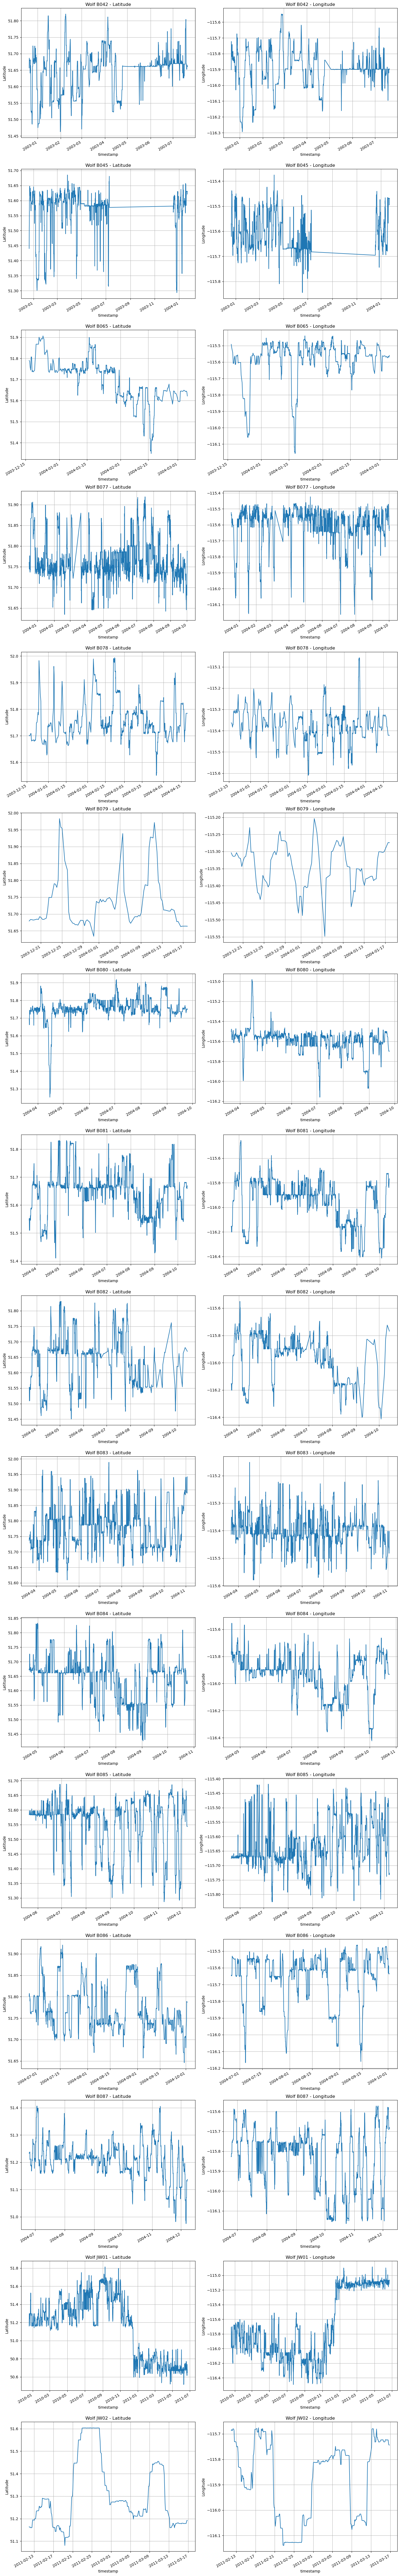

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
data = data[data['animal-type'] == 'Wolf']

# Assuming the data has columns 'timestamp', 'individual-id', 'location-lat', 'location-long'
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.sort_values(['individual-id', 'timestamp'], inplace=True)

# Plotting
num_wolves = len(data['individual-id'].unique())
fig, axes = plt.subplots(nrows=num_wolves, ncols=2, figsize=(15, 6 * num_wolves), squeeze=False)

for idx, (wolf_id, group) in enumerate(data.groupby('individual-id')):
    group.set_index('timestamp', inplace=True)
    
    group['location-lat'].plot(ax=axes[idx][0], title=f"Wolf {wolf_id} - Latitude")
    axes[idx][0].set_ylabel('Latitude')
    axes[idx][0].grid(True)

    group['location-long'].plot(ax=axes[idx][1], title=f"Wolf {wolf_id} - Longitude")
    axes[idx][1].set_ylabel('Longitude')
    axes[idx][1].grid(True)

plt.tight_layout()
plt.show()

## EDA - Wolf & Elk

### Wolf and elk movement correlation !!!!

In [3]:
####

### Movement map wolf & elk

In [ ]:
import folium
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter and sort data for elk and wolf
data['timestamp'] = pd.to_datetime(data['timestamp'])
elk_data = data[data['animal-type'] == 'Elk'].sort_values(by=['individual-id', 'timestamp'])
wolf_data = data[data['animal-type'] == 'Wolf'].sort_values(by=['individual-id', 'timestamp'])

# Initialize a base map
map_center = [(elk_data['location-lat'].mean() + wolf_data['location-lat'].mean()) / 2,
              (elk_data['location-long'].mean() + wolf_data['location-long'].mean()) / 2]
movement_map = folium.Map(location=map_center, zoom_start=6)

# Function to add lines to the map
def add_movement_lines(animal_data, line_color, map_obj):
    for animal_id in animal_data['individual-id'].unique():
        animal = animal_data[animal_data['individual-id'] == animal_id]
        locations = animal[['location-lat', 'location-long']].values.tolist()
        if len(locations) > 1:  # Need at least two points to create a line
            folium.PolyLine(locations, color=line_color, weight=2, opacity=0.3).add_to(map_obj)

# Add movement lines for wolves in red
add_movement_lines(wolf_data, 'red', movement_map)

# Add movement lines for elk in green
add_movement_lines(elk_data, 'green', movement_map)

# Save the map to an HTML file
output_html_path = '../Visualisation/EDA/Movement_map_elk_wolf.html'
movement_map.save(output_html_path)

movement_map

##### With ranch pack in blue

In [ ]:
import folium
import pandas as pd

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Filter and sort data for elk and wolf
data['timestamp'] = pd.to_datetime(data['timestamp'])
elk_data = data[data['animal-type'] == 'Elk'].sort_values(by=['individual-id', 'timestamp'])
wolf_data = data[(data['animal-type'] == 'Wolf') & (data['Pack name'] != 'Ranch')].sort_values(by=['individual-id', 'timestamp'])
ranch_wolf_data = data[(data['animal-type'] == 'Wolf') & (data['Pack name'] == 'Ranch')].sort_values(by=['individual-id', 'timestamp'])

# Initialize a base map
map_center = [(elk_data['location-lat'].mean() + wolf_data['location-lat'].mean()) / 2,
              (elk_data['location-long'].mean() + wolf_data['location-long'].mean()) / 2]
movement_map = folium.Map(location=map_center, zoom_start=6)

# Function to add lines to the map
def add_movement_lines(animal_data, line_color, map_obj):
    for animal_id in animal_data['individual-id'].unique():
        animal = animal_data[animal_data['individual-id'] == animal_id]
        locations = animal[['location-lat', 'location-long']].values.tolist()
        if len(locations) > 1:  # Need at least two points to create a line
            folium.PolyLine(locations, color=line_color, weight=2, opacity=0.5).add_to(map_obj)

# Add movement lines for wolves (excluding Ranch pack) in red
add_movement_lines(wolf_data, 'red', movement_map)

# Add movement lines for Ranch wolves in blue
add_movement_lines(ranch_wolf_data, 'blue', movement_map)

# Add movement lines for elk in green
add_movement_lines(elk_data, 'green', movement_map)

# Save the map to an HTML file
output_html_path = '../Visualisation/EDA/Movement_map_elk_ranch_wolf.html'
movement_map.save(output_html_path)

movement_map


### Proximity analysis
##### Compute proximity metric from nearest clusters using K-means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from geopy.distance import geodesic

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)

# Separate elk and wolf data based on 'animal-type'
elk_data = data[data['animal-type'] == 'Elk']
wolf_data = data[data['animal-type'] == 'Wolf']

# Perform K-Means clustering on elk data
elk_coords = elk_data[['location-lat', 'location-long']]
kmeans = KMeans(n_clusters=11, random_state=0).fit(elk_coords)
centroids = kmeans.cluster_centers_

# Initialize list to store proximity data
proximity_values = []

# Calculate proximity for each wolf observation
for index, wolf in wolf_data.iterrows():
    nearest_distance = float('inf')
    for centroid in centroids:
        distance = geodesic((wolf['location-lat'], wolf['location-long']), centroid).kilometers
        if distance < nearest_distance:
            nearest_distance = distance

    # Calculate proximity metric and store it with index to ensure alignment
    proximity_value = 1 / (nearest_distance + 1)  # Inverse of distance to model closeness
    proximity_values.append({'index': index, 'Proximity': proximity_value})

# Create a DataFrame from the proximity values
proximity_df = pd.DataFrame(proximity_values).set_index('index')

# Join the proximity data back to the wolf data using the index
wolf_data = wolf_data.join(proximity_df, on=wolf_data.index, rsuffix='_proximity')

# Update the main data DataFrame with the new proximity values for wolves
data.loc[wolf_data.index, 'Proximity'] = wolf_data['Proximity']

# Save the updated DataFrame
data.to_csv('../Data/EDA/merged_data.csv', index=False)


##### Wolves with highest proximity

d = 0.8 = 0.25 km <br>
d = 0.5 = 1 km

In [ ]:
# Filter wolf_data based on proximity higher than 0.8
high_proximity_wolves = wolf_data[wolf_data['Proximity'] > 0.5]

# Get the unique individual IDs and pack names of the wolves with high proximity
unique_high_proximity_wolves_info = high_proximity_wolves[['individual-id', 'Pack name']].drop_duplicates()

print("Unique individual IDs and pack names of wolves with proximity higher than 0.5:")
print(unique_high_proximity_wolves_info)


#### Proximity map

In [ ]:
import matplotlib.colors as mcolors
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../Data/merged_data.csv'
data = pd.read_csv(file_path)
wolf_data = data[data['animal-type'] == 'Wolf']

# Create a map centered around the average location
map_center = [wolf_data['location-lat'].mean(), wolf_data['location-long'].mean()]
proximity_map = folium.Map(location=map_center, zoom_start=6)

# Define the color mapping function
def color_proximity(value):
    norm = plt.Normalize(wolf_data['Proximity'].min(), wolf_data['Proximity'].max())
    cmap = plt.cm.viridis
    rgb = cmap(norm(value))  # RGB from RGBA
    return mcolors.to_hex(rgb[:3])  # Convert to hexadecimal

# Add markers for each wolf location colored by proximity
for index, row in wolf_data.iterrows():
    folium.CircleMarker(
        location=(row['location-lat'], row['location-long']),
        radius=5,  
        color=color_proximity(row['Proximity']),  # Convert proximity to a color
        fill=True,
        fill_color=color_proximity(row['Proximity']),
        fill_opacity=0.7
    ).add_to(proximity_map)


# Save the map to an HTML file
output_html_path = '../Visualisation/EDA/proximity_map.html'
proximity_map.save(output_html_path)

proximity_map